<a href="https://colab.research.google.com/github/hrahmia/Gunun-tekrari-pazar-sonra-sil/blob/master/OLS_Validating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/Rahmi')
%cd /gdrive

Drive already mounted at /Rahmi; to attempt to forcibly remount, call drive.mount("/Rahmi", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
df = pd.read_hdf('/Rahmi/MyDrive/DATA CAMP/Explanatory Data Analysis Data Sets/gss.hdf5')

In [ ]:
df.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [ ]:
#Richest Individual
df.iloc[df['realinc'].argmax()]

year         1977.0000
age            58.0000
cohort       1919.0000
sex             1.0000
race            1.0000
educ           16.0000
realinc    162607.0000
gunlaw          1.0000
grass              NaN
wtssall         0.9881
Name: 7603, dtype: float64

Text(0, 0.5, 'Income (1986 $)')

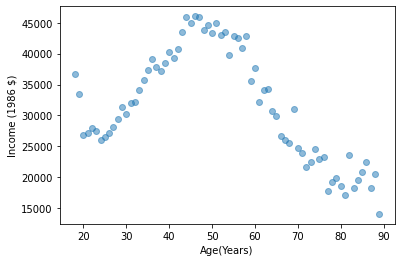

In [ ]:
grouped = df.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age(Years)')
plt.ylabel('Income (1986 $)')

In [ ]:
ols = smf.ols('realinc ~ educ + age', data = df).fit()
ols.pvalues
ols.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [ ]:
df['grass'].value_counts()

2.0    25195
1.0    11027
Name: grass, dtype: int64

## Adding Quadratic Terms to OLS
To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables.

In [ ]:
df['age2'] = df['age'] ** 2   # Quadratic term for age variable

In [ ]:
df['educ2'] = df['educ'] ** 2 # Quadratic term for education variable

###Construction OLS Model - Predicting Income with Age, Age2, Educ and Educ2

In [ ]:
results = smf.ols('realinc ~ age + age2 + educ + educ2', data = df).fit()
results.params

Intercept   -23241.884034
age           1696.717149
age2           -17.196984
educ          -528.309369
educ2          159.966740
dtype: float64

There are non-lnear relationships, thus; paramaeters are hard to interpret, since the values are divergent. Fortunately, there's another way to understant the model, which is making predictions; rather than looking at its parameters.

## Using predict() method to generate predictions to Validate Prediction

In [ ]:
# Now I will control the education variable at its constant for three levels with its quadratic versions - 12 Highshool, 14 Assicoate and 16 Bachelors Degree
#1 - Highschool+
dff = pd.DataFrame()
dff['age'] = np.linspace(18,85)
dff['age2'] = dff['age'] ** 2
dff['educ'] = 12 # All column will be 12 as it's education constant value
dff['educ2'] = dff['educ'] ** 2
dff.head()


,age,age2,educ,educ2
0,18.000000,324.000000,12,144
1,19.367347,375.094127,12,144
2,20.734694,429.927530,12,144
3,22.102041,488.500208,12,144
4,23.469388,550.812162,12,144


In [ ]:
results.params

Intercept   -23241.884034
age           1696.717149
age2           -17.196984
educ          -528.309369
educ2          159.966740
dtype: float64

In [ ]:
# MLR for Highschool
pred12 = results.predict(dff)

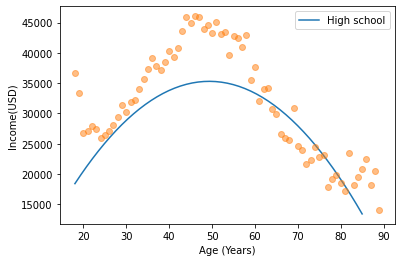

In [ ]:
#Plotting The Prediction - Higschool
plt.plot(dff['age'], pred12, label = 'High school')
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age (Years)')
plt.ylabel('Income(USD)')
plt.legend()

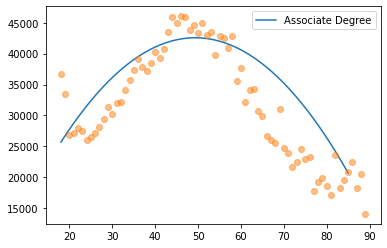

In [ ]:
#2 Associate Degree
dff['educ'] = 14
dff['educ2'] = dff['educ']**2
pred14 = results.predict(dff) # MMLR Model
plt.plot(dff['age'],pred14, label = 'Associate Degree'  )
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.legend()

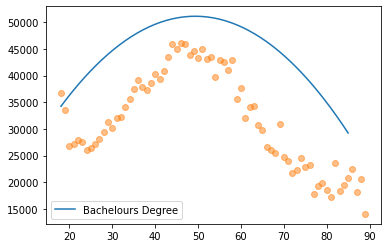

In [ ]:
# Bachelors Degree
dff['educ'] = 16
dff['educ2'] = dff['educ']**2
pred16 = results.predict(dff) #MLR Model
plt.plot(dff['age'], pred16, label = "Bachelours Degree" )
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.legend()

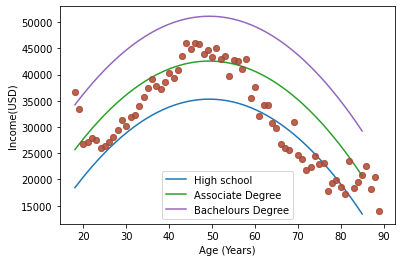

In [ ]:
#Plotting The Prediction - Higschool
plt.plot(dff['age'], pred12, label = 'High school')
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age (Years)')
plt.ylabel('Income(USD)')
plt.legend()

#2 Associate Degree
dff['educ'] = 14
dff['educ2'] = dff['educ']**2
pred14 = results.predict(dff)
plt.plot(dff['age'],pred14, label = 'Associate Degree'  )
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.legend()

# Bachelors Degree
dff['educ'] = 16
dff['educ2'] = dff['educ']**2
pred16 = results.predict(dff)
plt.plot(dff['age'], pred16, label = "Bachelours Degree" )
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.legend()



The lines show mean income, as predicted by model , as a function of age for three levels of education. This visualization helps us to interpret the model since we can see the seperate contributions of age and education

## Logistic Regression



In [ ]:
dfl = df.copy() # Dikkat, IVs can not have '0' as a categorical variable

In [ ]:
dfl['gunlaw'].value_counts()
dfl['gunlaw'].replace(2, 0, inplace = True)

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [ ]:
# Checking Support for the Gunlaw - We have to recode it as 1 means yes, 0 means no
dfl['gunlaw'].value_counts()
dfl['gunlaw'].replace(2, 0, inplace = True)
results = smf.logit('gunlaw ~ age + age2 + educ + educ2 + C(sex)', data = dfl).fit()
print(results.params)


Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6
Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64


In [ ]:
# With Edcuation variable is constant, I will generate predictions for different ages and sexes. First we need to have a DF with Age, Age2, Educ and Educ2
dfll = pd.DataFrame()
dfll['age'] = np.linspace(18, 89)
#if youw wanted to add jitter to age -> dfll['age']  = dfll['age']  + np.random.rand(0,2, size = len(dfll))
dfll['educ'] = 12

#Age2 and Edcu2
dfll['age2'] = dfll['age'] **2
dfll['educ2'] = dfll['educ'] ** 2

#Printing out the new dataframe dfll
print(dfll.head())

         age  educ        age2  educ2
0  18.000000    12  324.000000    144
1  19.448980    12  378.262807    144
2  20.897959    12  436.724698    144
3  22.346939    12  499.385673    144
4  23.795918    12  566.245731    144


In [ ]:
#Prediction for men
dfll['sex'] = 1
predmen = results.predict(dfll)



In [ ]:
#prediction for women
dfll['sex'] = 2
predwom = results.predict(dfll)


## Plotting Logistic Regression Results
Steps = First Get the Correlation of Support from Original Data


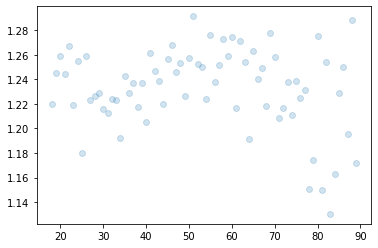

In [ ]:
#Vusiuazling the Results - Original
#favor_by_age = df.groupby('age')['gunlaw'].mean()
grouped = df.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha = 0.2)

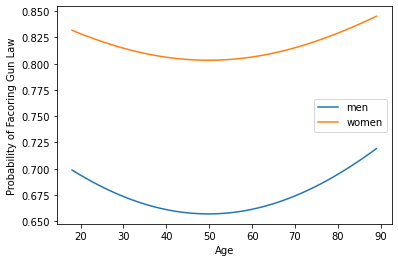

In [ ]:
#Prediciton Results
plt.plot(dfll['age'], predmen, label = 'men')
plt.plot(dfll['age'], predwom, label  = 'women')
plt.xlabel('Age')
plt.ylabel('Probability of Facoring Gun Law')
plt.legend()

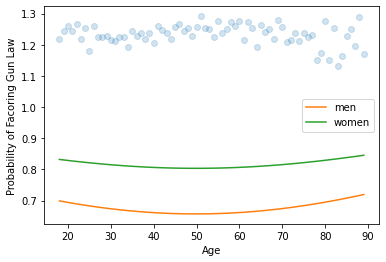

In [ ]:
# Combining Two Plots
#Vusiuazling the Results - Original Data
favor_by_age = df.groupby('age')['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha = 0.2)
#Prediciton Results
plt.plot(dfll['age'], predmen, label = 'men')
plt.plot(dfll['age'], predwom, label  = 'women')
plt.xlabel('Age')
plt.ylabel('Probability of Facoring Gun Law')
plt.legend()